In [1]:
import pandas as pd
import numpy as np
import geopandas
import shapely.geometry as geom
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Generation of different baselines 

## Pop-Density Baseline

In [2]:
zones_data = geopandas.GeoDataFrame.from_file('/local/tarciso/data/pesquisa-od-ctba/shapefiles/181zonas_metadata.shp')

In [12]:
macrozones_density = zones_data.groupby('cod_macroz') \
                                    .agg({'densidade':'sum'}) \
                                    .reset_index() \
                                    .assign(densidade = lambda x: x.densidade/sum(x.densidade)) \
                                    .rename(index=str, columns={'densidade':'pop_density'})

In [13]:
macrozones_density

,cod_macroz,pop_density
0,1.0,0.192068
1,2.0,0.144332
2,3.0,0.111909
3,4.0,0.061180
4,5.0,0.113174
5,6.0,0.079210
6,7.0,0.102418
7,8.0,0.061365
8,9.0,0.109374
9,10.0,0.024971


In [32]:
macrozones_density.to_csv('/local/tarciso/data/od-mat-validation/macrozones_pop_density.csv',index=False)

In [22]:
sum(macrozones_density['pop_density'])

1.0000000000000002

In [23]:
orig_macrozones_density = macrozones_density.add_suffix('_o')
dest_macrozones_density = macrozones_density.add_suffix('_d')

In [24]:
orig_macrozones_density

,cod_macroz_o,pop_density_o
0,1.0,0.192068
1,2.0,0.144332
2,3.0,0.111909
3,4.0,0.061180
4,5.0,0.113174
5,6.0,0.079210
6,7.0,0.102418
7,8.0,0.061365
8,9.0,0.109374
9,10.0,0.024971


In [25]:
dest_macrozones_density

,cod_macroz_d,pop_density_d
0,1.0,0.192068
1,2.0,0.144332
2,3.0,0.111909
3,4.0,0.061180
4,5.0,0.113174
5,6.0,0.079210
6,7.0,0.102418
7,8.0,0.061365
8,9.0,0.109374
9,10.0,0.024971


In [28]:
popd_zones_trips = orig_macrozones_density.assign(key = 1).merge(dest_macrozones_density.assign(key = 1), how='outer') \
                                            .assign(prop_trips = lambda x: x.pop_density_o * x.pop_density_d) \
                                            .filter(['cod_macroz_o','cod_macroz_d','prop_trips'])

In [29]:
popd_zones_trips

,cod_macroz_o,cod_macroz_d,prop_trips
0,1.0,1.0,0.036890
1,1.0,2.0,0.027722
2,1.0,3.0,0.021494
3,1.0,4.0,0.011751
4,1.0,5.0,0.021737
5,1.0,6.0,0.015214
6,1.0,7.0,0.019671
7,1.0,8.0,0.011786
8,1.0,9.0,0.021007
9,1.0,10.0,0.004796


In [30]:
popd_baseline_odmat = popd_zones_trips.pivot(index='cod_macroz_o',columns='cod_macroz_d',values='prop_trips')

In [31]:
popd_baseline_odmat

cod_macroz_d,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
cod_macroz_o,,,,,,,,,,
1.0,0.036890,0.027722,0.021494,0.011751,0.021737,0.015214,0.019671,0.011786,0.021007,0.004796
2.0,0.027722,0.020832,0.016152,0.008830,0.016335,0.011433,0.014782,0.008857,0.015786,0.003604
3.0,0.021494,0.016152,0.012524,0.006847,0.012665,0.008864,0.011462,0.006867,0.012240,0.002794
4.0,0.011751,0.008830,0.006847,0.003743,0.006924,0.004846,0.006266,0.003754,0.006691,0.001528
5.0,0.021737,0.016335,0.012665,0.006924,0.012808,0.008964,0.011591,0.006945,0.012378,0.002826
6.0,0.015214,0.011433,0.008864,0.004846,0.008964,0.006274,0.008113,0.004861,0.008663,0.001978
7.0,0.019671,0.014782,0.011462,0.006266,0.011591,0.008113,0.010490,0.006285,0.011202,0.002557
8.0,0.011786,0.008857,0.006867,0.003754,0.006945,0.004861,0.006285,0.003766,0.006712,0.001532
9.0,0.021007,0.015786,0.012240,0.006691,0.012378,0.008663,0.011202,0.006712,0.011963,0.002731


In [34]:
popd_baseline_odmat.to_csv('/local/tarciso/data/od-mat-validation/popd_baseline_macrozones_norm_freqs.csv')

## Start from origin zone-matched data

### Bus-Station matched Origins (BUSTE result)

#### Reading and Preparing Origin zone-matched data

In [2]:
trips_origins = pd.read_csv('/local/tarciso/data/buste/BUSTE/2017_05_01/part-00000')

In [3]:
trips_origins.head()

,route,tripNum,shapeId,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,busCode,gpsPointId,gpsLat,...,distanceToShapePoint,gps_datetime,stopPointId,problem,boarding_id,lineName,cardNum,birthdate,gender,boarding_datetime
0,828,1,2941,4248625,-25.492550,-49.296841,400.358,JA018,-,-25.492508,...,7.728849,2017-05-01 05:40:49,35555,NO_PROBLEM,-,-,-,-,-,-
1,828,1,2941,4248629,-25.492562,-49.298461,563.236,JA018,-,-,...,-,2017-05-01 05:41:05,35342,BETWEEN,-,-,-,-,-,-
2,828,1,2941,4248639,-25.492591,-49.301514,870.229,JA018,-,-,...,-,2017-05-01 05:41:45,35347,BETWEEN,-,-,-,-,-,-
3,828,1,2941,4248646,-25.492607,-49.304261,1146.416,JA018,-,-,...,-,2017-05-01 05:42:04,35349,BETWEEN,-,-,-,-,-,-
4,828,1,2941,4248649,-25.492615,-49.305682,1289.256,JA018,-,-25.49257,...,9.059651,2017-05-01 05:42:23,35354,NO_PROBLEM,-,-,-,-,-,-


In [4]:
trips_origins.dtypes

route                      int64
tripNum                    int64
shapeId                    int64
shapeSequence              int64
shapeLat                 float64
shapeLon                 float64
distanceTraveledShape    float64
busCode                   object
gpsPointId                object
gpsLat                    object
gpsLon                    object
distanceToShapePoint      object
gps_datetime              object
stopPointId                int64
problem                   object
boarding_id               object
lineName                  object
cardNum                   object
birthdate                 object
gender                    object
boarding_datetime         object
dtype: object

In [5]:
trips_origins_clean = trips_origins[trips_origins['boarding_datetime'] != '-'] \
                        .filter(['cardNum','boarding_datetime','stopPointId','shapeLat','shapeLon'])

In [6]:
trips_origins_clean.head()

,cardNum,boarding_datetime,stopPointId,shapeLat,shapeLon
7,2519829,2017-05-01 05:44:16,35361,-25.492670,-49.312632
15,3802989,2017-05-01 05:55:45,35122,-25.476052,-49.331007
21,2055057,2017-05-01 06:00:03,35142,-25.464539,-49.326736
28,3016550,2017-05-01 06:07:21,34257,-25.460141,-49.340811
29,3252537,2017-05-01 06:07:17,34257,-25.460141,-49.340811


## Performing spatial join between the trips origin/destination locations and the city zones

### Reading and Preparing Zones data

#### Reading Zones Shape with metadata

In [7]:
zones_data = geopandas.GeoDataFrame.from_file('/local/tarciso/data/pesquisa-od-ctba/shapefiles/181zonas_metadata.shp')

In [8]:
zones_data.head()

,cod_zona,cod_macroz,municipio,densidade,geometry
0,101,NaN,ALMIRANTE TAMANDARÉ,880,POLYGON ((-49.29741553499997 -25.2822542629999...
1,102,NaN,ALMIRANTE TAMANDARÉ,99,POLYGON ((-49.28261024699998 -25.2283294099999...
2,103,NaN,ALMIRANTE TAMANDARÉ,1376,POLYGON ((-49.29659437999993 -25.3252657799999...
3,104,NaN,ALMIRANTE TAMANDARÉ,4343,POLYGON ((-49.27108138899996 -25.3133959639999...
4,111,NaN,ARAUCÁRIA,1344,POLYGON ((-49.33834275899994 -25.5150800969999...


### Spatially Joining Estimated Trips and Zones data based on origin and destination zone location

#### Transforming Trips dataframe into a geo dataframe

In [9]:
trips_origins_clean.head()

,cardNum,boarding_datetime,stopPointId,shapeLat,shapeLon
7,2519829,2017-05-01 05:44:16,35361,-25.492670,-49.312632
15,3802989,2017-05-01 05:55:45,35122,-25.476052,-49.331007
21,2055057,2017-05-01 06:00:03,35142,-25.464539,-49.326736
28,3016550,2017-05-01 06:07:21,34257,-25.460141,-49.340811
29,3252537,2017-05-01 06:07:17,34257,-25.460141,-49.340811


In [10]:
trips_origins_clean['origin'] = list(zip(trips_origins_clean.shapeLon, trips_origins_clean.shapeLat))
trips_origins_clean['origin'] = trips_origins_clean['origin'].apply(geom.Point)

In [11]:
trips_origins_gdf = geopandas.GeoDataFrame(trips_origins_clean, geometry='origin', crs=zones_data.crs)

In [12]:
trips_origins_gdf.head()

,cardNum,boarding_datetime,stopPointId,shapeLat,shapeLon,origin
7,2519829,2017-05-01 05:44:16,35361,-25.492670,-49.312632,POINT (-49.31263200950718 -25.49267015769395)
15,3802989,2017-05-01 05:55:45,35122,-25.476052,-49.331007,POINT (-49.33100713068848 -25.4760521036565)
21,2055057,2017-05-01 06:00:03,35142,-25.464539,-49.326736,POINT (-49.32673615613425 -25.46453913619429)
28,3016550,2017-05-01 06:07:21,34257,-25.460141,-49.340811,POINT (-49.3408112081965 -25.46014075741902)
29,3252537,2017-05-01 06:07:17,34257,-25.460141,-49.340811,POINT (-49.3408112081965 -25.46014075741902)


#### Performing spatial join operation

In [13]:
zones_data.head()

,cod_zona,cod_macroz,municipio,densidade,geometry
0,101,NaN,ALMIRANTE TAMANDARÉ,880,POLYGON ((-49.29741553499997 -25.2822542629999...
1,102,NaN,ALMIRANTE TAMANDARÉ,99,POLYGON ((-49.28261024699998 -25.2283294099999...
2,103,NaN,ALMIRANTE TAMANDARÉ,1376,POLYGON ((-49.29659437999993 -25.3252657799999...
3,104,NaN,ALMIRANTE TAMANDARÉ,4343,POLYGON ((-49.27108138899996 -25.3133959639999...
4,111,NaN,ARAUCÁRIA,1344,POLYGON ((-49.33834275899994 -25.5150800969999...


In [14]:
trips_origin_zones = geopandas.sjoin(trips_origins_gdf, 
                                        zones_data.add_suffix('_o').rename(index=str,columns={'geometry_o':'geometry'}),
                                        how='left',
                                        op='within') \
                                .drop('index_right', axis=1)

In [15]:
trips_origin_zones.head()

,cardNum,boarding_datetime,stopPointId,shapeLat,shapeLon,origin,cod_zona_o,cod_macroz_o,municipio_o,densidade_o
7,2519829,2017-05-01 05:44:16,35361,-25.492670,-49.312632,POINT (-49.31263200950718 -25.49267015769395),681,7.0,CURITIBA,12762
15,3802989,2017-05-01 05:55:45,35122,-25.476052,-49.331007,POINT (-49.33100713068848 -25.4760521036565),712,4.0,CURITIBA,8334
21,2055057,2017-05-01 06:00:03,35142,-25.464539,-49.326736,POINT (-49.32673615613425 -25.46453913619429),712,4.0,CURITIBA,8334
28,3016550,2017-05-01 06:07:21,34257,-25.460141,-49.340811,POINT (-49.3408112081965 -25.46014075741902),1022,8.0,CURITIBA,11909
29,3252537,2017-05-01 06:07:17,34257,-25.460141,-49.340811,POINT (-49.3408112081965 -25.46014075741902),1022,8.0,CURITIBA,11909


In [16]:
trips_origin_zones[pd.isnull(trips_origin_zones['cod_zona_o'])]

,cardNum,boarding_datetime,stopPointId,shapeLat,shapeLon,origin,cod_zona_o,cod_macroz_o,municipio_o,densidade_o


In [17]:
trips_origin_zones.dtypes

cardNum               object
boarding_datetime     object
stopPointId            int64
shapeLat             float64
shapeLon             float64
origin                object
cod_zona_o             int64
cod_macroz_o         float64
municipio_o           object
densidade_o            int64
dtype: object

### Inferring Aggregated Destination Macrozones based on Origin Population Density 

In [18]:
agg_trips_origin_zones = trips_origin_zones.groupby('cod_macroz_o').cardNum.count().reset_index() \
                                            .rename(index=str, columns={'cardNum':'macroz_total_boardings'})

In [19]:
agg_trips_origin_zones

,cod_macroz_o,macroz_total_boardings
0,1.0,750
1,2.0,217
2,3.0,154
3,4.0,425
4,5.0,308
5,6.0,174
6,7.0,303
7,8.0,434
8,9.0,475
9,10.0,319


In [20]:
zones_data.head()

,cod_zona,cod_macroz,municipio,densidade,geometry
0,101,NaN,ALMIRANTE TAMANDARÉ,880,POLYGON ((-49.29741553499997 -25.2822542629999...
1,102,NaN,ALMIRANTE TAMANDARÉ,99,POLYGON ((-49.28261024699998 -25.2283294099999...
2,103,NaN,ALMIRANTE TAMANDARÉ,1376,POLYGON ((-49.29659437999993 -25.3252657799999...
3,104,NaN,ALMIRANTE TAMANDARÉ,4343,POLYGON ((-49.27108138899996 -25.3133959639999...
4,111,NaN,ARAUCÁRIA,1344,POLYGON ((-49.33834275899994 -25.5150800969999...


In [21]:
dest_macrozones_density = zones_data.groupby('cod_macroz') \
                                    .agg({'densidade':'sum'}) \
                                    .reset_index() \
                                    .assign(densidade = lambda x: x.densidade/sum(x.densidade)) \
                                    .rename(index=str, columns={'cod_macroz':'cod_macroz_d','densidade':'pop_density'})

In [22]:
dest_macrozones_density

,cod_macroz_d,pop_density
0,1.0,0.192068
1,2.0,0.144332
2,3.0,0.111909
3,4.0,0.061180
4,5.0,0.113174
5,6.0,0.079210
6,7.0,0.102418
7,8.0,0.061365
8,9.0,0.109374
9,10.0,0.024971


In [23]:
sum(dest_macrozones_density['pop_density'])

1.0000000000000002

In [24]:
agg_trips_origin_zones

,cod_macroz_o,macroz_total_boardings
0,1.0,750
1,2.0,217
2,3.0,154
3,4.0,425
4,5.0,308
5,6.0,174
6,7.0,303
7,8.0,434
8,9.0,475
9,10.0,319


In [25]:
agg_trips_origin_zones['key'] = 1
dest_macrozones_density['key'] = 1

In [26]:
agg_trips_od_zones = agg_trips_origin_zones.merge(dest_macrozones_density, how='outer') \
                                        .filter(['cod_macroz_o','cod_macroz_d','macroz_total_boardings','pop_density']) \
                                        .assign(num_trips = lambda x: np.rint(x.macroz_total_boardings*x.pop_density))

In [27]:
agg_trips_od_zones

,cod_macroz_o,cod_macroz_d,macroz_total_boardings,pop_density,num_trips
0,1.0,1.0,750,0.192068,144.0
1,1.0,2.0,750,0.144332,108.0
2,1.0,3.0,750,0.111909,84.0
3,1.0,4.0,750,0.061180,46.0
4,1.0,5.0,750,0.113174,85.0
5,1.0,6.0,750,0.079210,59.0
6,1.0,7.0,750,0.102418,77.0
7,1.0,8.0,750,0.061365,46.0
8,1.0,9.0,750,0.109374,82.0
9,1.0,10.0,750,0.024971,19.0


In [28]:
agg_trips_od_zones.groupby(['cod_macroz_o']).agg({'num_trips':'sum'})

,num_trips
cod_macroz_o,
1.0,750.0
2.0,216.0
3.0,153.0
4.0,426.0
5.0,308.0
6.0,174.0
7.0,304.0
8.0,434.0
9.0,476.0


In [29]:
baseline_1 = agg_trips_od_zones.filter(['cod_macroz_o','cod_macroz_d','num_trips'])

In [30]:
baseline_1

,cod_macroz_o,cod_macroz_d,num_trips
0,1.0,1.0,144.0
1,1.0,2.0,108.0
2,1.0,3.0,84.0
3,1.0,4.0,46.0
4,1.0,5.0,85.0
5,1.0,6.0,59.0
6,1.0,7.0,77.0
7,1.0,8.0,46.0
8,1.0,9.0,82.0
9,1.0,10.0,19.0


## Generating Estimated Trips OD Matrix for Macrozones

In [31]:
base1_macrozones_freqs = baseline_1.pivot(index='cod_macroz_o',columns='cod_macroz_d',values='num_trips')

In [32]:
base1_macrozones_freqs

cod_macroz_d,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
cod_macroz_o,,,,,,,,,,
1.0,144.0,108.0,84.0,46.0,85.0,59.0,77.0,46.0,82.0,19.0
2.0,42.0,31.0,24.0,13.0,25.0,17.0,22.0,13.0,24.0,5.0
3.0,30.0,22.0,17.0,9.0,17.0,12.0,16.0,9.0,17.0,4.0
4.0,82.0,61.0,48.0,26.0,48.0,34.0,44.0,26.0,46.0,11.0
5.0,59.0,44.0,34.0,19.0,35.0,24.0,32.0,19.0,34.0,8.0
6.0,33.0,25.0,19.0,11.0,20.0,14.0,18.0,11.0,19.0,4.0
7.0,58.0,44.0,34.0,19.0,34.0,24.0,31.0,19.0,33.0,8.0
8.0,83.0,63.0,49.0,27.0,49.0,34.0,44.0,27.0,47.0,11.0
9.0,91.0,69.0,53.0,29.0,54.0,38.0,49.0,29.0,52.0,12.0


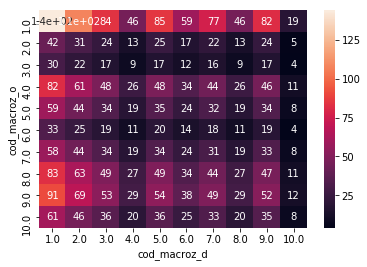

In [33]:
sns.heatmap(base1_macrozones_freqs, annot=True)

In [34]:
base1_macrozones_norm_freqs = base1_macrozones_freqs/base1_macrozones_freqs.values.sum()

In [35]:
base1_macrozones_norm_freqs

cod_macroz_d,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
cod_macroz_o,,,,,,,,,,
1.0,0.040438,0.030329,0.023589,0.012918,0.023870,0.016568,0.021623,0.012918,0.023027,0.005336
2.0,0.011794,0.008705,0.006740,0.003651,0.007020,0.004774,0.006178,0.003651,0.006740,0.001404
3.0,0.008425,0.006178,0.004774,0.002527,0.004774,0.003370,0.004493,0.002527,0.004774,0.001123
4.0,0.023027,0.017130,0.013479,0.007301,0.013479,0.009548,0.012356,0.007301,0.012918,0.003089
5.0,0.016568,0.012356,0.009548,0.005336,0.009829,0.006740,0.008986,0.005336,0.009548,0.002247
6.0,0.009267,0.007020,0.005336,0.003089,0.005616,0.003931,0.005055,0.003089,0.005336,0.001123
7.0,0.016288,0.012356,0.009548,0.005336,0.009548,0.006740,0.008705,0.005336,0.009267,0.002247
8.0,0.023308,0.017692,0.013760,0.007582,0.013760,0.009548,0.012356,0.007582,0.013199,0.003089
9.0,0.025555,0.019377,0.014883,0.008144,0.015164,0.010671,0.013760,0.008144,0.014603,0.003370


In [36]:
base1_macrozones_norm_freqs.to_csv('/local/tarciso/data/od-mat-validation/base1_macrozones_norm_freqs.csv')

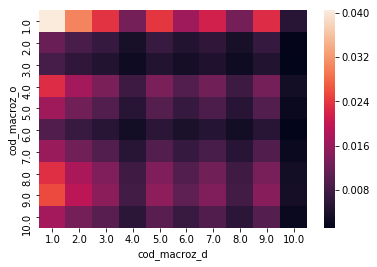

In [37]:
sns.heatmap(base1_macrozones_norm_freqs)